# SUMMARY

- Linear models might benefit greatly from generating new features via binning and adding polynomials and interactions, while more complex, nonlinear models like random forests and SVMs might be able to learn more complex tasks without explicitly expanding the feature space. 
- In practice, the features that are used (and the match between features and method) is often the most important piece in making a machine learning approach work well.
- As we see in the last example, it might be better to use polynomials to create interaction between the data that creating features yourself - althought that could work too in some cases.


# 4.1 Categorical variables

- **One Hot Enconding**: We replace categorical variables with one or more new features that can have values 0 and 1.

In [17]:
import pandas as pd

data = pd.read_csv("../data/credit.csv")

# for illustrion purposes, we select only a few columns
data = data[["Income", "Age", "Ethnicity", "Gender"]]

display(data.head())


,Income,Age,Ethnicity,Gender
0,14.891,34,Caucasian,Male
1,106.025,82,Asian,Female
2,104.593,71,Asian,Male
3,148.924,36,Asian,Female
4,55.882,68,Caucasian,Male


Before we do the encoding, it is good to check if the data is consistent.

In [18]:
print(data.Ethnicity.value_counts())

Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64


In [11]:
print(f"Original features: \n {list(data.columns)} \n")
data_dummies = pd.get_dummies(data)

print(f"Features after get_dummies:\n {list(data_dummies.columns)}")

Original features: 
 ['Income', 'Age', 'Ethnicity', 'Gender'] 

Features after get_dummies:
 ['Income', 'Age', 'Ethnicity_African American', 'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Gender_ Male', 'Gender_Female']


Sometimes, datasets have categorical values encoded as numbers. For example, a web form could return values as 1, 2, 3 if user selected option 1, or option, or option 3. In these cases, we need to use OneHot enconder from SciKit, or we need to be explicity about the columns you want to encode.

In [14]:
# create a DF with an integer feature and a categorical string feature

demo_df = pd.DataFrame({"Integer Feature": [0, 1, 2, 1],
"Categorical Feature": ["birds", "cats", "dogs", "cats"]})

display(demo_df)

# Explicity tells the column is an category, not a "number"
demo_df["Integer Feature"] = demo_df["Integer Feature"].astype(str)

pd.get_dummies(demo_df, columns=["Integer Feature", "Categorical Feature"])



,Integer Feature,Categorical Feature
0,0,birds
1,1,cats
2,2,dogs
3,1,cats


,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_birds,Categorical Feature_cats,Categorical Feature_dogs
0,True,False,False,True,False,False
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,False,True,False


# 4.2 Binning (also known as discretisation)

Sometimes the models might work better if you create binning for continuous variables. This is usually the case for linear models, but not for tree-based models.

In [23]:
import numpy as np

# First le'ts check what are the youngest and oldest ages
print(data.Age.value_counts().sort_index())

# Now let's create the 10 bins - Ps you use then 11 in the third argument because you specificy the splits

# I would use the code below if it didn't matter to get decimals
#bins = np.linspace(23, 98, 10)

#I will use this code so I ensure the beans are only intengers
bins = np.arange(23, 99, 10)

print(f"bins: {bins}")

Age
23    1
24    3
25    7
26    1
27    2
     ..
86    1
87    2
89    1
91    1
98    1
Name: count, Length: 68, dtype: int64
bins: [23 33 43 53 63 73 83 93]


In [25]:
# Now we compute for each data point which bin they fall into

which_bin = np.digitize(data.Age, bins=bins)
print(f"\n Data points {data[:5]}")
print(f"\n Membership of the data points {which_bin[:5]}")


 Data points     Income  Age  Ethnicity  Gender
0   14.891   34  Caucasian    Male
1  106.025   82      Asian  Female
2  104.593   71      Asian    Male
3  148.924   36      Asian  Female
4   55.882   68  Caucasian    Male

 Membership of the data points [2 6 5 2 5]


In [43]:
# now we could go on and transform the bin category

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Reshape array2 to have shape (400, 1)
which_bin_reshaped = which_bin.reshape(-1, 1) # this preserves the number of lines, adds info about 1 column
data_combined = np.hstack([data, which_bin_reshaped])

print("\n Data stacked:\n", data_combined[:5])

#encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin.reshape(-1,1))

#transform creates the one-hot encoding
data_binned = encoder.transform(which_bin.reshape(-1,1))

print("\nData binned:\n", data_binned[:5])


 Data stacked:
 [[14.891 34 'Caucasian' ' Male' 2]
 [106.025 82 'Asian' 'Female' 6]
 [104.593 71 'Asian' ' Male' 5]
 [148.924 36 'Asian' 'Female' 2]
 [55.882 68 'Caucasian' ' Male' 5]]

Data binned:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


Here in the data binned, we have a new array in which each row represents the bin to which the data belongs to. For example, the first point belongs to bin 2. So the second column of the first row in this array =1, while the other columns =0.

# 4.3 Interactions and Polynomials
Adding polynomial features can help linear models for regression, but for more complex models, it can actually decrease their performance.


In [57]:
from sklearn.linear_model import  LinearRegression

data_combined = np.hstack([data, data_binned])

print(f"Shape data combined: {data_combined.shape}")

print(data_combined[:5])

X = data_combined[:, [1,4]]
y = data_combined[:, 0]

reg = LinearRegression().fit(X, y)

reg.score(X, y)

#X_product = np.hstack([X, X * data_binned] )



Shape data combined: (400, 12)
[[14.891 34 'Caucasian' ' Male' 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [106.025 82 'Asian' 'Female' 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0]
 [104.593 71 'Asian' ' Male' 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]
 [148.924 36 'Asian' 'Female' 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [55.882 68 'Caucasian' ' Male' 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0]]


0.031792504756906426

In [67]:
from sklearn.preprocessing import PolynomialFeatures

# includes polynomials up to x ** 10
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print(X_poly.shape)


# comparing the entried of X to those in X_poly
print(f"Entries of X: \n{X[:5]}")
print(f"Entris of X_poly:\n{X_poly[:5]}")




(400, 65)
Entries of X: 
[[34 0.0]
 [82 0.0]
 [71 0.0]
 [36 0.0]
 [68 0.0]]
Entris of X_poly:
[[3.40000000e+01 0.00000000e+00 1.15600000e+03 0.00000000e+00
  0.00000000e+00 3.93040000e+04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.33633600e+06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.54354240e+07 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.54480442e+09 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.25233501e+10
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.78579390e+12
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.07169928e+13 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.06437775e+15 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.0000

In [68]:
# you can obtain the semantics of the features by calling get_features_names_out
print(f"Polynomial feature names: \n {poly.get_feature_names_out()}")

Polynomial feature names: 
 ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3' 'x0^4'
 'x0^3 x1' 'x0^2 x1^2' 'x0 x1^3' 'x1^4' 'x0^5' 'x0^4 x1' 'x0^3 x1^2'
 'x0^2 x1^3' 'x0 x1^4' 'x1^5' 'x0^6' 'x0^5 x1' 'x0^4 x1^2' 'x0^3 x1^3'
 'x0^2 x1^4' 'x0 x1^5' 'x1^6' 'x0^7' 'x0^6 x1' 'x0^5 x1^2' 'x0^4 x1^3'
 'x0^3 x1^4' 'x0^2 x1^5' 'x0 x1^6' 'x1^7' 'x0^8' 'x0^7 x1' 'x0^6 x1^2'
 'x0^5 x1^3' 'x0^4 x1^4' 'x0^3 x1^5' 'x0^2 x1^6' 'x0 x1^7' 'x1^8' 'x0^9'
 'x0^8 x1' 'x0^7 x1^2' 'x0^6 x1^3' 'x0^5 x1^4' 'x0^4 x1^5' 'x0^3 x1^6'
 'x0^2 x1^7' 'x0 x1^8' 'x1^9' 'x0^10' 'x0^9 x1' 'x0^8 x1^2' 'x0^7 x1^3'
 'x0^6 x1^4' 'x0^5 x1^5' 'x0^4 x1^6' 'x0^3 x1^7' 'x0^2 x1^8' 'x0 x1^9'
 'x1^10']


In [70]:
# Now, if we run the model, we will have a better score, 
# as the line of the model will have been made smoother due to the polynomial

reg = LinearRegression().fit(X_poly, y)
print(reg.score(X_poly, y))

# this is not a good model OFC, but only for demonstration

0.13210871273642388


# 4.5 Univariate Nonlinear Transformations

Most models work best when the data (and the target), are Gaussian distributed. Using transformations like "log" and "exp" is a hacky simple way to achieve this.

Sometimes only a subset of features should be transformed, or different transformations for different features. It depends, this is an art! 

These transformations are important for linear models, not so much for tree-based models.

Number of features appearances:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

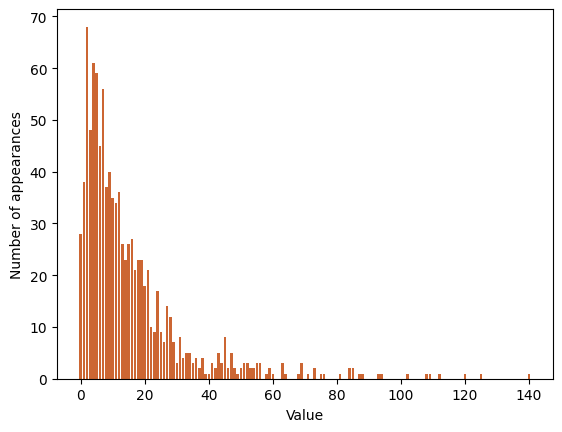

In [78]:
# example, by generating random values

%matplotlib inline
import matplotlib.pyplot as plt

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

print(f"Number of features appearances:\n {np.bincount(X[:, 0])}")

# bincount always start at 0
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color=(0.8, 0.4, 0.2)) # the value for color is RGB
plt.ylabel("Number of appearances")
plt.xlabel("Value")

This cases are very common in reality, with some values very large, and some very low. Linear models do not handle this very well, so we need to treat it.

Applying a logarithmic can help. **Because value 0 appear in the data, and log(0) is not defined, we have to computer log X+1**

Test score before transformation  0.6224186236310756
Test score after transformation  0.8749342372887815


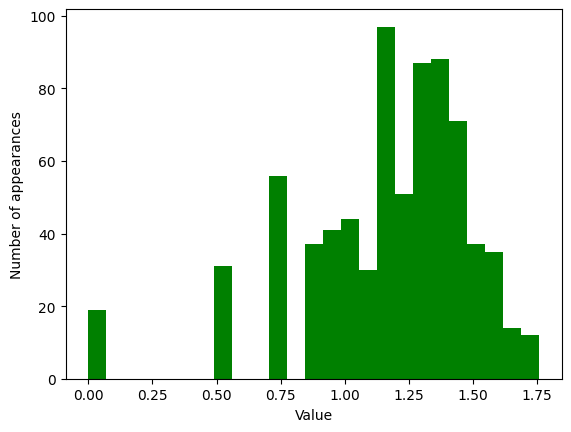

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)

print("Test score before transformation ", score)

# now transforming
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

plt.hist(np.log(X_train_log[:, 0]+1), bins=25, color="g")
plt.ylabel("Number of appearances")
plt.xlabel("Value")

score_with_log = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score after transformation ", score_with_log )

# 4.6 Automatic Feature Selection

## 4.6.1 Univariate Statistics (ANOVA)

With ANOVA, we compute if there is a statistically significant relationship between the feature and the target, and the features with the highest confidence are selected. They then discart features with high p-values. 
As method of selection:
- SelectKB: selects a number k of features
- SelectPercentile: selects a fixed percentage of features

In Scikit-learn, you need to choose f_classif (default, for classification) or f_regression.

The performance might not change much in some cases, like in the next example, however ANOVA is still useful if you have such a large number of features that creating a model with all would be infesible or if you suspect many features do not matter.

**This form of selection looks at the features individually, so if a feature has only use when use in combination with another, it will be automatically excluded**

X_train shape: (284, 80)
X_train_selected shape: (284, 40)
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

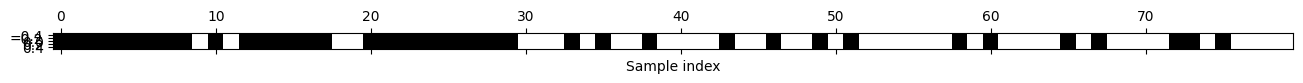

In [97]:
# Example with the cancer dataset, also adding some noice

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the DS, the next 50 are noise for this examples
X_w_noise = np.hstack([cancer.data, noise])


X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.5)

# use f_classif and selectpercentitle to 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

#transform training set
X_train_selected = select.transform(X_train)

print(f"X_train shape: {X_train.shape}")
print(f"X_train_selected shape: {X_train_selected.shape}")


# to show which features have been selected we use the method get_support that returns a Boolean mask of the selected features
mask = select.get_support()
print(mask)

#visualise the mask - black is True, white is false
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")

In [98]:
from sklearn.linear_model import LogisticRegression

# we will compare the performace of the model with the original features and the selected features

# transform the test data
X_test_selected = select.transform(X_test)

logreg = LogisticRegression(max_iter=1000000) # here I changed the number of max_iter to remove the warning message

logreg.fit(X_train, y_train)
print(f"Score with all features: {logreg.score(X_test, y_test):.3f}")

logreg.fit(X_train_selected, y_train)
print(f"Score with ANOVA selected features {logreg.score(X_test_selected, y_test):.3f}")

Score with all features: 0.947
Score with ANOVA selected features 0.933


## 4.6.2 Model-Based feature selection
In this cases, we use another model to select which features are important, before fitting our final model.

- For tree models, the feature_importances_ shows info regarding the features that are more important for the model
- For linear models, the absolute value of the coefficients are used

**This form of selection can look at features in combination, opposite to ANOVA**

X_train shape: (284, 80)
X_train_l1 shape: (284, 40)


Text(0.5, 0, 'Sample index')

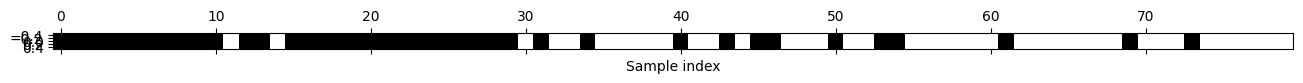

In [99]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
# here we use the threshold as median to compare the performace with the ANOVA example above.
#It will select only 50% of the features

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print(f"X_train shape: {X_train.shape}")
print(f"X_train_l1 shape: {X_train_l1.shape}")

# visualising the features selected
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")

In [101]:
# now checking the performance

X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=100000).fit(X_train_l1, y_train).score(X_test_l1, y_test)

print(f"Score with selected Model-based selected features: {score:.3f}")

Score with selected Model-based selected features: 0.947


## 4.6.3 Iterative Feature Selection

In this form of selection, we build several models after each other until a stop criterium is reached.
You can either start the model with one feature, and then go adding new features, or start with all features, and go removing the less important ones (an example of this is RFE - _recursive feature elimination_, used below).
These methods are computationally expesive because you need to create and train several models.

Text(0.5, 0, 'Sample index')

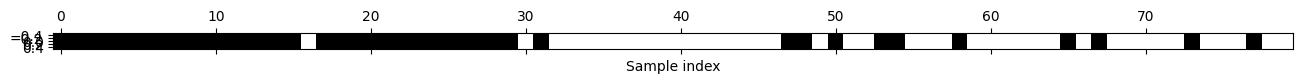

In [102]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)

select.fit(X_train, y_train)

# visualise the selected features
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")



In [104]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=100000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f"Score with selected RFE selection: {score:.3f}")

Score with selected RFE selection: 0.940


# 4.7 Example of application of the methods above


Citi Bike data:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3h, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

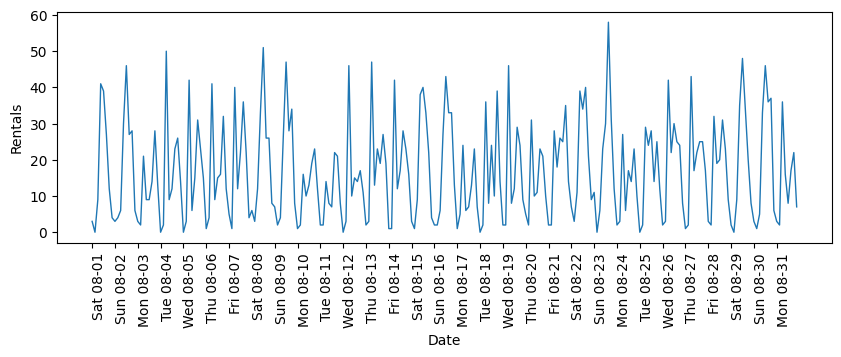

In [108]:
import mglearn

citibike = mglearn.datasets.load_citibike()

print("Citi Bike data:\n", citibike.head())

plt.figure(figsize=(10,3))

xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq="D")

plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

Looking at the data we can see when the bikes are rented from a specific rental point. But we can't tell much else. However we know that the behaviour can be different in the weekdays and weekeneds.

Also important to keep in mind: **When we evaluate a time series, we want to learn from the past and predict for the future**. So this will have an impact on how we split our X_Train, X_test.

In [118]:
# to make it easier to work with the data, we will convert it to POSIX time,
# which is the number of seconds since January 1970 (the beginning of UNIX time)

y = citibike.values

#X = citibike.index.strftime("%s").astype("int").reshape(-1, 1)
X = citibike.index.strftime("%s").astype("int").to_numpy().reshape(-1, 1)


# now we create a function to split the data into training and test sets, build the model and visualise the result

n_train = 184 # the first 184 entries wilk be used to train

# function to evalute and plot a regressor on a given feature set
def evaluate(features, target, regressor):
    # split the given feature into a training and test set
    X_train, X_test = features[:n_train], features[n_train:]

    # also splits the target
    y_train, y_test = target[:n_train], target[n_train:]

    regressor.fit(X_train, y_train)

    print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")

    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)

    # plot
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")



The first model we will try is the RandomForest, as it required little pre-processing of the data

Test-set R^2: -0.04


<Figure size 640x480 with 0 Axes>

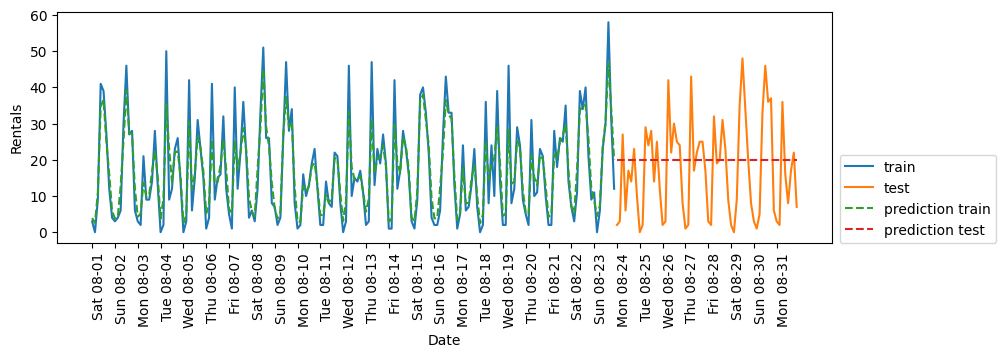

In [119]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

plt.figure()

evaluate(X, y, regressor)

However we encounter a problem, as with trees, they cannot predict outside the scope that they were given. The R2 is also negative, which means we learned nothing.

We will now use only the hour of the day, instead of using the time in POSIX.

Test-set R^2: 0.60


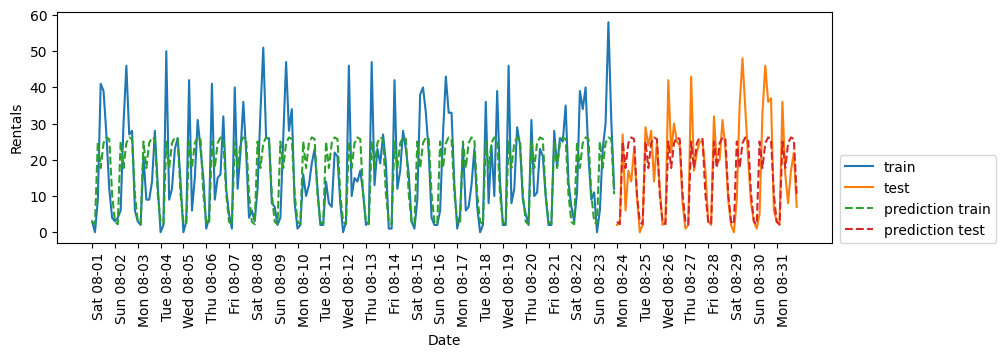

In [122]:
X_hour = citibike.index.hour.to_numpy().reshape(-1,1)
evaluate(X_hour, y, regressor)

Now the predictions are better. The Random forest is now using the hour as a pattern, which is still in the range in the train data. But we might be missing the weekend pattern. So we will add that information now.

Test-set R^2: 0.84


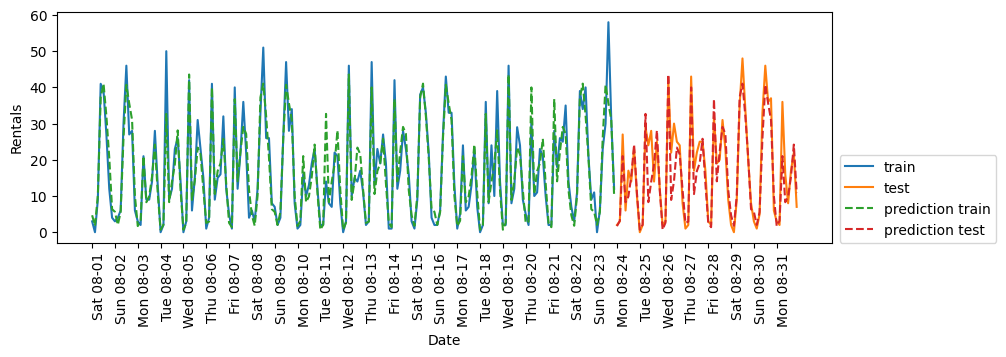

In [125]:
X_hour_week = np.hstack( [citibike.index.dayofweek.to_numpy().reshape(-1,1),
citibike.index.hour.to_numpy().reshape(-1,1)])

evaluate(X_hour_week, y, regressor)

Now we have a good result! Let's try Linear Regression for funs!

Test-set R^2: 0.13


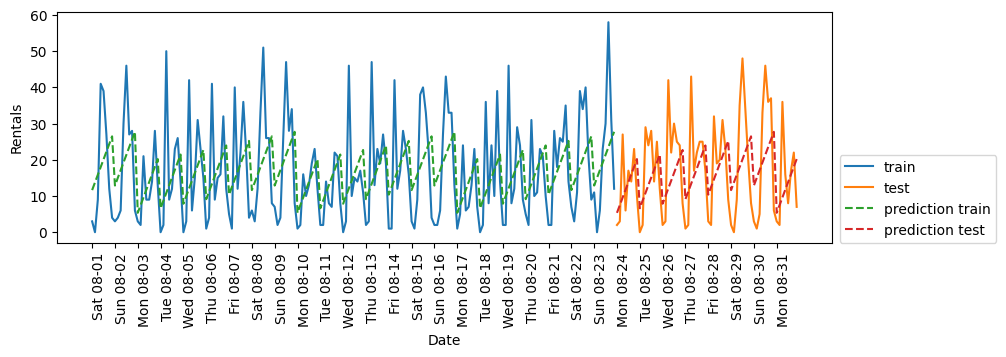

In [126]:
from sklearn.linear_model import LinearRegression

evaluate(X_hour_week, y, LinearRegression())

Now the intepretation looks worse, because the day / time are categorical variables. So we need to treat that before feeding it to the code.

Test-set R^2: 0.62


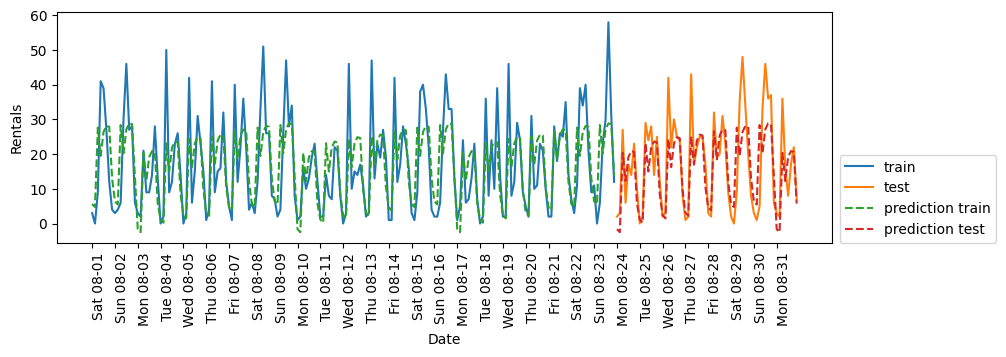

In [129]:
encoder = OneHotEncoder()

X_hour_week_onehot = encoder.fit_transform(X_hour_week).toarray()
evaluate(X_hour_week_onehot, y, LinearRegression())

_This gives us a much better match than the continuous feature encoding. Now the
linear model learns one coefficient for each day of the week, and one coefficient for
each time of the day. That means that the “time of day” pattern is shared over all days
of the week, though.
Using interaction features, we can allow the model to learn one coefficient for each
combination of day and time of day_ 

Test-set R^2: 0.85


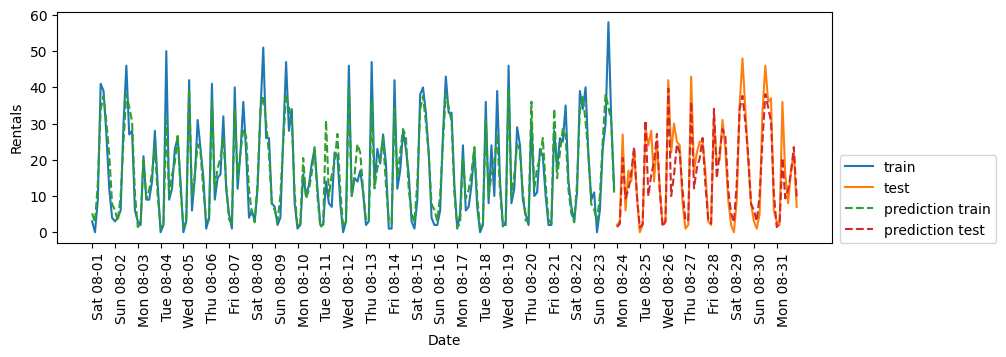

In [130]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_hour_week_poly = poly_transformer.fit_transform(X_hour_week_onehot)

lr = Ridge()

evaluate(X_hour_week_poly, y, lr)

The advantage of using this model over the RandomForest is that we have one coefficient for each day of the week and time. And with so, we can plot them:

In [131]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [133]:
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature')

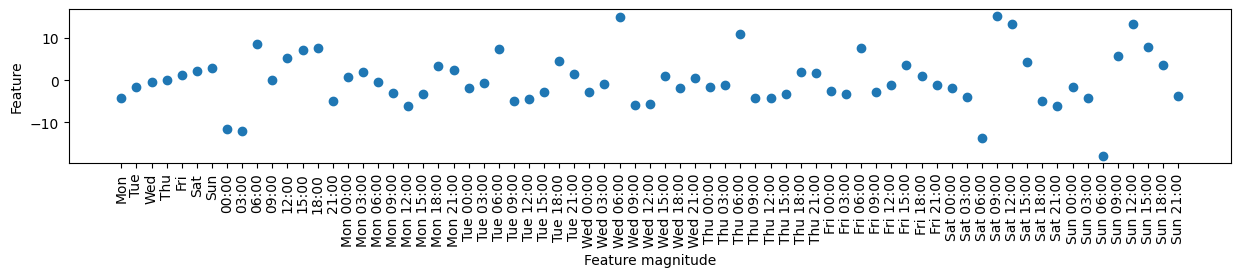

In [134]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")